In [1]:
import requests
import bs4
from bs4 import BeautifulSoup

In [2]:
#고양이  
import json
from pprint import pprint

base_url= 'https://www.pimfyvirus.com/dataurl_action/homeprotectionlist02/p=/search/02/p={}//'
# print(type(base_url))


req_header = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest" #파일구조가 Json이라 필요 
}

cat_data_list = list()

for  i in range(1,20): #페이지 범위 
    url=base_url.format(i)
    #network에서 응답이 post로 처리하게 되어있음 
    res=requests.post(url,headers=req_header)

    

    if(res.ok):
        # print(res.url)
        data = res.json()
        
        for item in data.get('lst',[]):
            cat_data_dict = dict()
            
            link = item['wish']
            cat_id = link.strip('/').split('/')[-1]     
            tags=item['tag']  
            breed = item['info23']
            date = item['info2']
            t2 = item['t2']

            parts = t2.split("/")
            name = parts[0] 
            gender = parts[1] 
            weight = parts[2] 

            #dict 저장 
            cat_data_dict['ID']= cat_id
            cat_data_dict['tags']= tags
            cat_data_dict['이름']= name
            cat_data_dict['성별']= gender
            cat_data_dict['몸무게']= weight
            cat_data_dict['종']= breed
            cat_data_dict['공고날짜 ']= date
            
            cat_data_list.append(cat_data_dict)                 
    else:
        print(f'Error Code = {res.status_code}') 


print(len(cat_data_list))
pprint(cat_data_list) 

206
[{'ID': '2985',
  'tags': ['임보중', '입양전제'],
  '공고날짜 ': '2025-08-04',
  '몸무게': '4kg',
  '성별': '남',
  '이름': '두리',
  '종': '믹스'},
 {'ID': '2984',
  'tags': ['임보중', '릴레이임보'],
  '공고날짜 ': '2025-08-03',
  '몸무게': '1kg',
  '성별': '여',
  '이름': '별이',
  '종': '믹스'},
 {'ID': '2983',
  'tags': ['임보중', '릴레이임보'],
  '공고날짜 ': '2025-08-03',
  '몸무게': '4kg',
  '성별': '여',
  '이름': '세모',
  '종': '품종'},
 {'ID': '2927',
  'tags': ['임보가능', '입양전제'],
  '공고날짜 ': '2025-07-21',
  '몸무게': '08kg',
  '성별': '여',
  '이름': '달봉이',
  '종': '믹스'},
 {'ID': '2897',
  'tags': ['임보중', '입양전제'],
  '공고날짜 ': '2025-07-16',
  '몸무게': '3kg',
  '성별': '여',
  '이름': '콩이',
  '종': '믹스'},
 {'ID': '2893',
  'tags': ['임보중', '입양전제'],
  '공고날짜 ': '2025-07-15',
  '몸무게': '4kg',
  '성별': '남',
  '이름': '로담',
  '종': '품종'},
 {'ID': '2860',
  'tags': ['임보중', '입양전제'],
  '공고날짜 ': '2025-07-10',
  '몸무게': '06kg',
  '성별': '여',
  '이름': '로아',
  '종': '믹스'},
 {'ID': '2851',
  'tags': ['임보가능', '입양전제'],
  '공고날짜 ': '2025-07-09',
  '몸무게': '08kg',
  '성별': '남',
  '이름': '흑미',
  

In [3]:
import json 

with open('data/cat_data.json','w',encoding='utf-8') as file:
    json.dump(cat_data_list, file,ensure_ascii=False,indent=2)

In [4]:
import pandas as pd

cat_df = pd.read_json('data/cat_data.json')
print(type(cat_df))
cat_df.head()

<class 'pandas.core.frame.DataFrame'>


,ID,tags,이름,성별,몸무게,종,공고날짜
0,2985,"[임보중, 입양전제]",두리,남,4kg,믹스,2025-08-04
1,2984,"[임보중, 릴레이임보]",별이,여,1kg,믹스,2025-08-03
2,2983,"[임보중, 릴레이임보]",세모,여,4kg,품종,2025-08-03
3,2927,"[임보가능, 입양전제]",달봉이,여,08kg,믹스,2025-07-21
4,2897,"[임보중, 입양전제]",콩이,여,3kg,믹스,2025-07-16


### tag별 분석

In [5]:
cat_df.explode('tags')['tags'].value_counts()

tags
입양완료     69
임보중      65
입양전제     51
일반임보     45
임보가능     37
공고종료     35
릴레이임보     4
단기임보      1
긴급임보      1
Name: count, dtype: int64

In [6]:
cat_df.loc[cat_df['tags'].apply(lambda x: '입양완료' not in x and '공고종료' not in x)].reset_index()


,index,ID,tags,이름,성별,몸무게,종,공고날짜
0,0,2985,"[임보중, 입양전제]",두리,남,4kg,믹스,2025-08-04
1,1,2984,"[임보중, 릴레이임보]",별이,여,1kg,믹스,2025-08-03
2,2,2983,"[임보중, 릴레이임보]",세모,여,4kg,품종,2025-08-03
3,3,2927,"[임보가능, 입양전제]",달봉이,여,08kg,믹스,2025-07-21
4,4,2897,"[임보중, 입양전제]",콩이,여,3kg,믹스,2025-07-16
...,...,...,...,...,...,...,...,...
97,110,180,"[임보중, 일반임보]",사랑이,남,3kg,None,2024-03-01
98,111,173,"[임보중, 일반임보]",할리,여,3kg,None,2024-02-29
99,112,130,"[임보중, 입양전제]",소리,여,4kg,None,2024-02-21
100,113,93,"[임보중, 입양전제]",호동이,남,5kg,None,2024-02-19


In [7]:
cat_df.loc[cat_df['tags'].apply(lambda x: '입양완료' in x )].reset_index()

,index,ID,tags,이름,성별,몸무게,종,공고날짜
0,116,2848,[입양완료],바바,남,06kg,믹스,2025-07-09
1,117,2844,[입양완료],다다,남,06kg,믹스,2025-07-09
2,118,2843,[입양완료],푸름이,남,1kg,믹스,2025-07-09
3,119,2834,[입양완료],잭슨,남,3kg,믹스,2025-07-08
4,120,2833,[입양완료],에디,남,3kg,믹스,2025-07-08
...,...,...,...,...,...,...,...,...
64,180,526,[입양완료],레이,남,910kg,None,2024-06-15
65,181,416,[입양완료],호랑 나비,남,4kg,None,2024-05-17
66,182,182,[입양완료],빵순이,여,4kg,None,2024-03-01
67,183,124,[입양완료],사과,여,2kg,None,2024-02-21


In [8]:
cat_df.loc[cat_df['tags'].apply(lambda x: '공고종료' in x)].reset_index()

,index,ID,tags,이름,성별,몸무게,종,공고날짜
0,71,1496,[공고종료],꼬등,남,5kg,None,2024-12-30
1,75,1300,[공고종료],강동냥이_깻잎이,여,5kg,None,2024-11-25
2,81,1032,[공고종료],로즈,여,3kg,None,2024-10-14
3,82,1030,[공고종료],모찌,여,1kg,믹스,2024-10-14
4,85,860,[공고종료],옹심이,여,4kg,None,2024-09-04
5,92,764,[공고종료],콩심이,여,3kg,None,2024-08-08
6,95,675,[공고종료],봄,여,4kg,None,2024-07-20
7,99,549,[공고종료],삼순이,여,4kg,믹스,2024-06-23
8,101,506,[공고종료],개성 만점 카오스 &apos;랑이&apos;,여,2kg,None,2024-06-11
9,104,410,[공고종료],무싹,남,4kg,None,2024-05-15


In [9]:
cat_df['성별'].value_counts()

성별
남    105
여    101
Name: count, dtype: int64

In [10]:
cat_df['몸무게'].unique()

array(['4kg', '1kg', '08kg', '3kg', '06kg', '5kg', '6kg',
       '1kg (입양시 중성화 지원)', '03kg', '2kg', '7kg', '580kg', '0241kg',
       '900kg', '600kg', '05kg', '700kg', '172kg', '105kg', '850kg',
       '910kg'], dtype=object)

In [15]:
cat_df['몸무게'].value_counts()

몸무게
4kg                 52
3kg                 41
1kg                 35
5kg                 24
2kg                 23
6kg                  7
08kg                 4
05kg                 4
06kg                 3
7kg                  2
03kg                 1
580kg                1
0241kg               1
900kg                1
600kg                1
1kg (입양시 중성화 지원)     1
700kg                1
172kg                1
105kg                1
850kg                1
910kg                1
Name: count, dtype: int64

In [16]:
def weight(value):
    try:
        value = str(value).lower().replace('kg', '').replace(' ', '')
        value = ''.join(filter(lambda x: x.isdigit() or x == '.', value))  # 숫자와 소수점만
        if value == '':
            return None
        weight = float(value.lstrip("0") or "0")
        return weight if weight <= 7 else None
    except:
        return None

# 몸무게 숫자화 및 필터링
filtered_df_weight = cat_df.copy()
filtered_df_weight['몸무게(kg)'] = filtered_df_weight['몸무게'].apply(weight)
filtered_df_weight = filtered_df_weight[filtered_df_weight['몸무게(kg)'].notna()].reset_index(drop=True)

In [30]:
filtered_df_weight['몸무게(kg)'].unique()

array([4., 1., 3., 6., 5., 2., 7.])

In [31]:
# 3kg 미만 
filtered_df_weight[(filtered_df_weight['몸무게(kg)'] < 3)].sort_values(by='몸무게(kg)', ascending=False)

,ID,tags,이름,성별,몸무게,종,공고날짜,몸무게(kg)
122,1763,[입양완료],누리,남,2kg,믹스,2025-02-09,2.0
52,1941,"[임보중, 일반임보]",콩돌이,남,2kg,믹스,2025-03-06,2.0
128,1521,[입양완료],구슬이,여,2kg,None,2025-01-04,2.0
127,1551,[입양완료],아가,남,2kg,믹스,2025-01-08,2.0
124,1628,[입양완료],오즈,남,2kg,None,2025-01-19,2.0
123,1762,[입양완료],나나,남,2kg,품종,2025-02-09,2.0
149,1002,[입양완료],삐빅이,여,2kg,믹스,2024-10-10,2.0
110,62,"[임보중, 일반임보]",만두,남,2kg,None,2024-02-16,2.0
97,506,[공고종료],개성 만점 카오스 &apos;랑이&apos;,여,2kg,None,2024-06-11,2.0
152,883,[입양완료],어독스 앙꼬,남,2kg,믹스,2024-09-12,2.0


In [32]:
# 3kg ~ 6Kg
filtered_df_weight[(filtered_df_weight['몸무게(kg)'] >= 3) & (filtered_df_weight['몸무게(kg)'] <= 6)].sort_values(by='몸무게(kg)', ascending=False)

,ID,tags,이름,성별,몸무게,종,공고날짜,몸무게(kg)
45,2189,"[임보가능, 일반임보]",꽃님,여,6kg,품종,2025-04-12,6.0
29,2575,"[임보가능, 일반임보]",지원이,여,6kg,믹스,2025-06-02,6.0
130,1490,[입양완료],호밀이,남,6kg,None,2024-12-30,6.0
40,2319,"[임보중, 입양전제]",네발친_낙낙이,남,6kg,믹스,2025-04-30,6.0
22,2665,"[임보중, 입양전제]",동물구조119_부엉이,남,6kg,믹스,2025-06-12,6.0
...,...,...,...,...,...,...,...,...
71,1380,"[임보중, 긴급임보]",두부,남,3kg,믹스,2024-12-10,3.0
144,1125,[입양완료],순이,여,3kg,None,2024-10-30,3.0
145,1096,[입양완료],또롱이,남,3kg,None,2024-10-27,3.0
76,1083,"[임보중, 일반임보]",철수,남,3kg,None,2024-10-26,3.0


In [34]:
# 7kg 이상 
filtered_df_weight[(filtered_df_weight['몸무게(kg)'] >= 7)].sort_values(by='몸무게(kg)', ascending=False)

,ID,tags,이름,성별,몸무게,종,공고날짜,몸무게(kg)
58,1926,"[임보가능, 일반임보]",강동냥이_라떼,남,7kg,None,2025-03-03,7.0
68,1507,"[임보가능, 입양전제]",힘찬이,남,7kg,믹스,2025-01-01,7.0


In [18]:
cat_df['종'].unique()

array(['믹스', '품종', None], dtype=object)

In [20]:
cat_df['종'].value_counts()

종
믹스    74
품종    14
Name: count, dtype: int64

In [21]:
cat_df.loc[cat_df['종']=='믹스']

,ID,tags,이름,성별,몸무게,종,공고날짜,몸무게(kg)
0,2985,"[임보중, 입양전제]",두리,남,4kg,믹스,2025-08-04,4.0
1,2984,"[임보중, 릴레이임보]",별이,여,1kg,믹스,2025-08-03,1.0
3,2927,"[임보가능, 입양전제]",달봉이,여,08kg,믹스,2025-07-21,8.0
4,2897,"[임보중, 입양전제]",콩이,여,3kg,믹스,2025-07-16,3.0
6,2860,"[임보중, 입양전제]",로아,여,06kg,믹스,2025-07-10,6.0
...,...,...,...,...,...,...,...,...
186,2648,[공고종료],봉이,남,4kg,믹스,2025-06-09,4.0
187,2449,[공고종료],별빛이,여,1kg,믹스,2025-05-22,1.0
188,2448,[공고종료],금빛이,여,1kg,믹스,2025-05-22,1.0
189,2260,[공고종료],치즈냥이,여,3kg,믹스,2025-04-20,3.0


In [24]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [25]:
[(font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf')]

In [26]:
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)

matplotlib.rc('font',family=font_prop)

Malgun Gothic


In [27]:
# 한글 폰트 오류 방지 (윈도우라면 필요)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### tag별 시각화 

C:\Users\user\AppData\Local\Temp\ipykernel_7976\3029408801.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cat_df, x='현재 상태',order=status_order,palette='pastel')


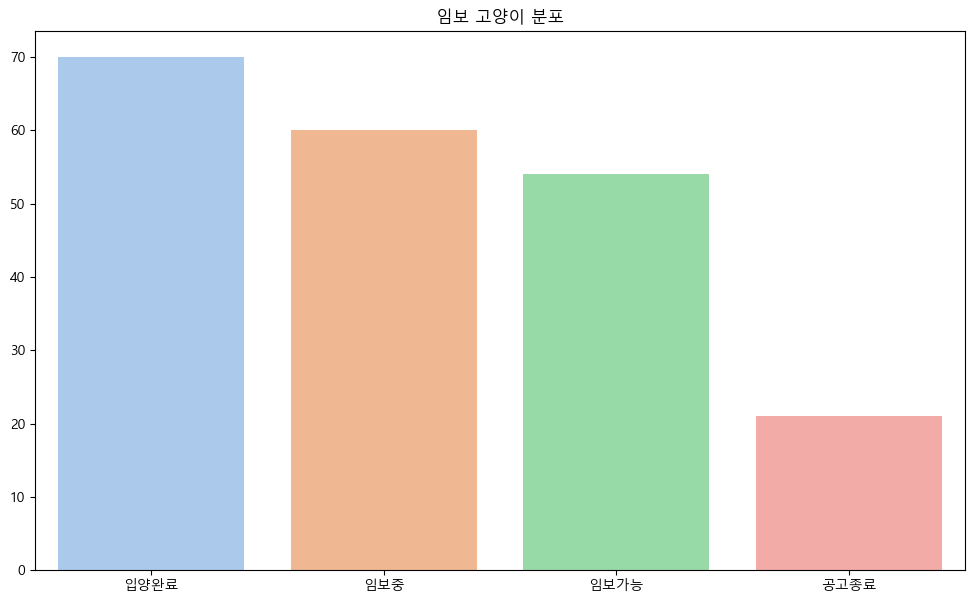

In [7]:
def classify_status(tag_list):
    if '공고종료' in tag_list:
        return '공고종료'
    elif '입양완료' in tag_list:
        return '입양완료'
    elif '임보중' in tag_list:
        return '임보중'
    else:
        return '임보가능'

cat_df['현재 상태'] = cat_df['tags'].apply(classify_status)

status_order = cat_df['현재 상태'].value_counts().sort_values(ascending=False).index.tolist()

plt.figure(figsize=(12, 7))
sns.countplot(data=cat_df, x='현재 상태',order=status_order,palette='pastel')
plt.title('임보 고양이 분포')
plt.xlabel('')
plt.ylabel('')
plt.show()

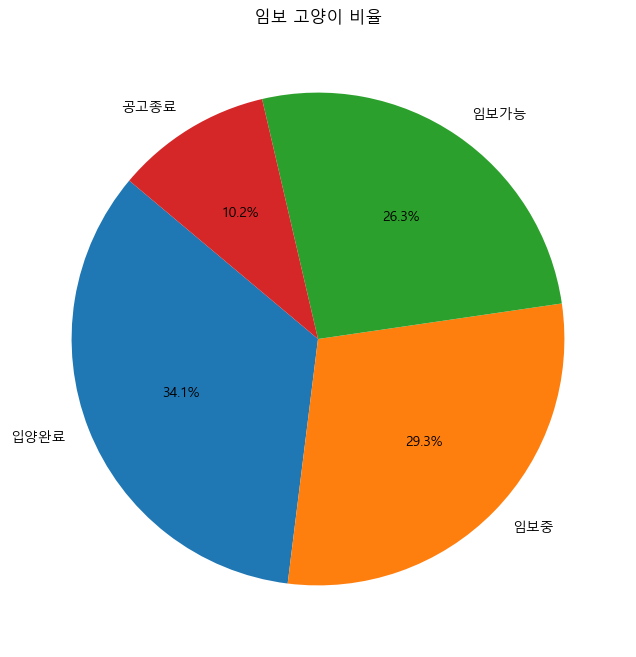

In [8]:
status_counts = cat_df['현재 상태'].value_counts()

labels = status_counts.index
sizes = status_counts.values

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('임보 고양이 비율')
plt.show()


### 기타 시각화 

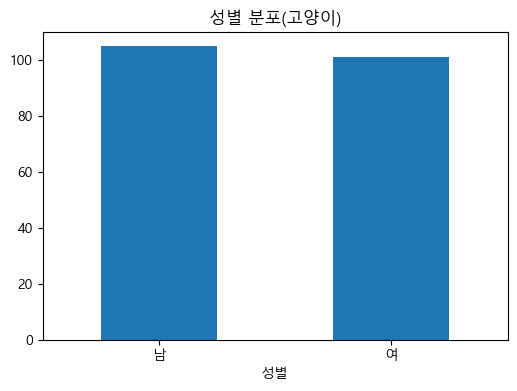

In [36]:
# 성별 시각화 
gender_counts = cat_df['성별'].value_counts()

plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar')
plt.title('성별 분포(고양이)')
plt.xlabel('성별')
plt.xticks(rotation=0)

plt.show()

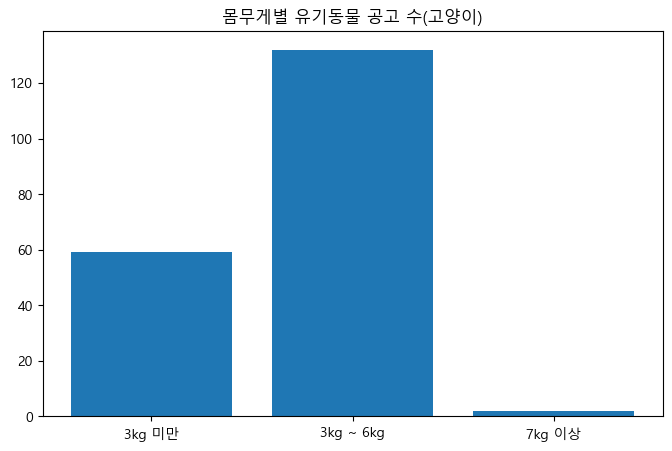

In [35]:
# 몸무게 시각화 
def size(weight):
    if weight < 3:
        return '3kg 미만'
    elif weight < 7:
        return '3kg ~ 6kg'
    else:
        return '7kg 이상'

filtered_df_weight['체급'] = filtered_df_weight['몸무게(kg)'].apply(size)

size_counts = filtered_df_weight['체급'].value_counts().reindex(['3kg 미만', '3kg ~ 6kg', '7kg 이상'])

plt.figure(figsize=(8, 5))
plt.bar(size_counts.index, size_counts.values)
plt.title('몸무게별 유기동물 공고 수(고양이)')

plt.show()